# **Results**

In [65]:
# magics
%load_ext autoreload
%reload_ext autoreload

%autoreload 2

# load general packages
import tools
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules
from model_nvfi import model_bufferstock

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/var/folders/67/5lclr44x13d7lzxtqq4c11r40000gn/T/ipykernel_10274/952247622.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


**Setup**

In [66]:
model = model_bufferstock()

In [67]:
sol = model.sol
par = model.par
aux = model.aux

model.setup()
model.allocate()

**State space**

In [68]:
model.state_space(approx_points=40)

T ===========  1
T ===========  2
T ===========  3
T ===========  4


In [ ]:
model.state_space(approx_points=40)

T ===========  1
T ===========  2
T ===========  3
T ===========  4


Check accuracy of approximations

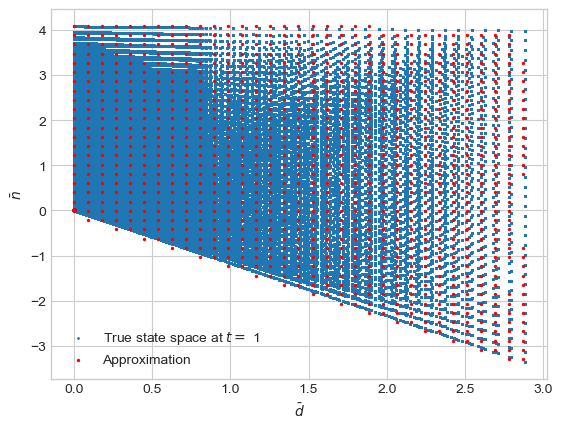

In [69]:
model.plot_state_space(t_plot=1,true_space=True)

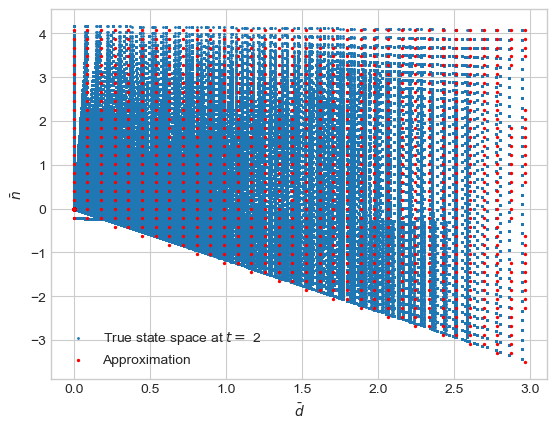

In [70]:
model.plot_state_space(t_plot=2,true_space=True)

Check state space over time

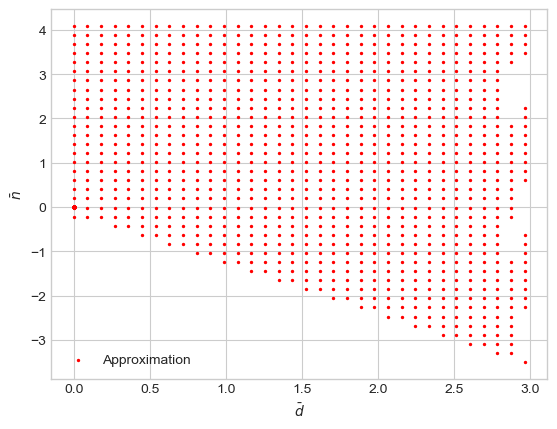

In [71]:
model.plot_state_space(t_plot=3)

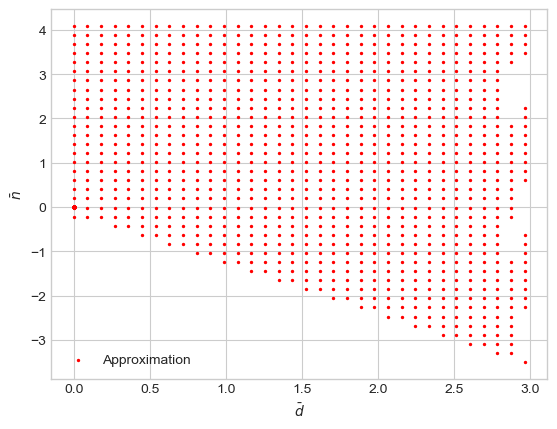

In [72]:
model.plot_state_space(t_plot=4)

Pretty static after $t=2$, maybe okay to only compute for two periods

**Solve with VFI**

In [104]:
model.setup()

In [105]:
model.allocate()

In [108]:
model.clean_ss()

In [111]:
model.solve_vfi()

T =  4
T =  3
T =  2
T =  1
T =  0


**OLD RESULTS !!! Before state space revelation**

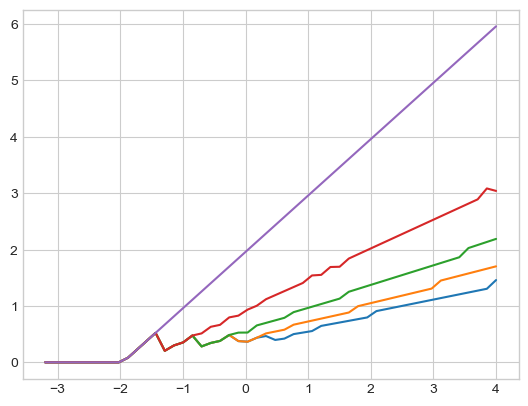

In [178]:
for t in range(par.T):
    plt.plot(aux.grid_n,sol.c[t,:,30,0])

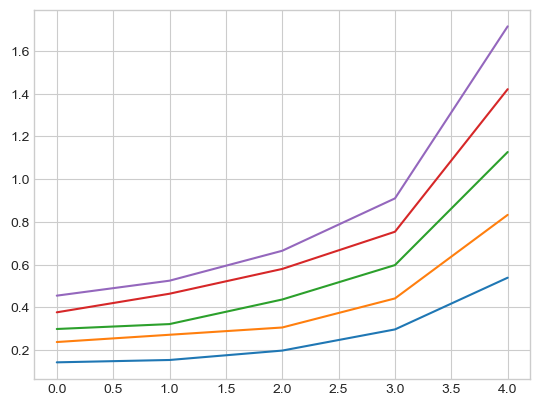

In [182]:
for n in range(25,35,2):
    plt.plot([0,1,2,3,4],sol.c[:,n,1,0])

Check last period

In [119]:
model.solve_last_period()

T ===========  9


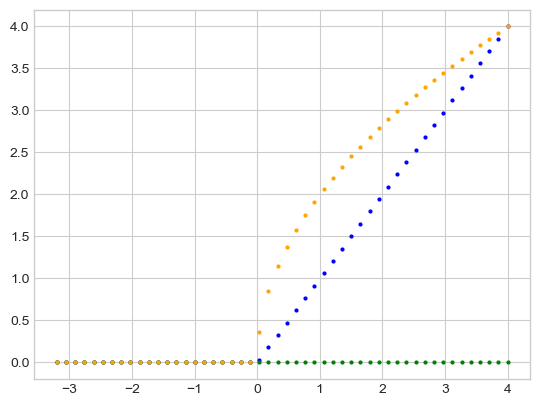

In [120]:
plt.plot(aux.grid_n, sol.c[par.T-1,:,0,0], 'o', ms=2, color='blue')
plt.plot(aux.grid_n, sol.d[par.T-1,:,0,0], 'o', ms=2, color='green')
plt.plot(aux.grid_n, sol.v[par.T-1,:,0,0], 'o', ms=2, color='orange')

Check post-decision value function

In [121]:
model.post_decision(par.T-2)

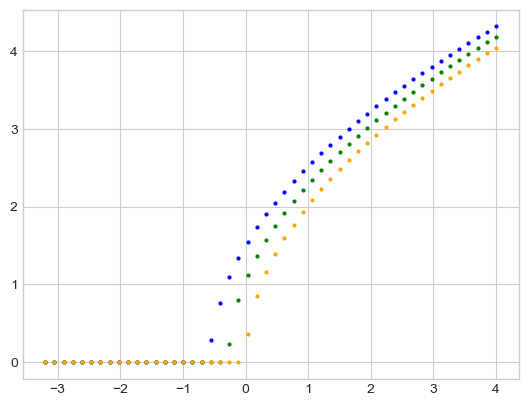

In [122]:
plt.plot(aux.grid_n, sol.w[par.T-2,:,10,0], 'o', ms=2, color='blue')
plt.plot(aux.grid_n, sol.w[par.T-2,:,5,0], 'o', ms=2, color='green')
plt.plot(aux.grid_n, sol.w[par.T-2,:,0,0], 'o', ms=2, color='orange')

Check interpolation of post-decision value function in keeper's problem

In [123]:
# Pick values from grid of n and d
n_bar = -2.0
d_bar = 0

# Calculate grid of c
c = model.grid_c(n_bar,d_bar)

# Post-decision states
n_bar_plus = (1 + par.r_a) * (n_bar - c) - (par.r_d - par.r_a) * d_bar
d_bar_plus = (1 - par.lambdaa) * d_bar * np.ones(par.N)

# Interpolation
v_plus = tools.interp_2d_vec(aux.grid_n, aux.grid_d, sol.w[par.T-2,:,:,0], n_bar_plus, d_bar_plus)

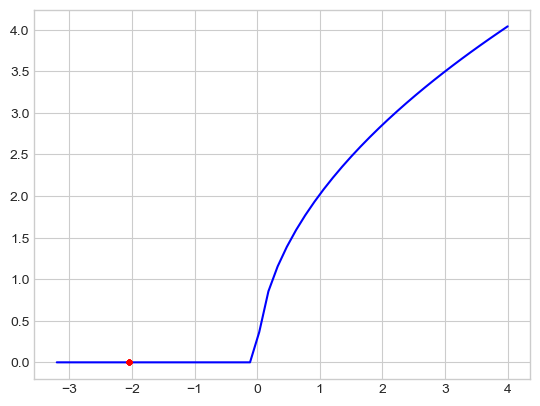

In [124]:
# Post-decision value function
plt.plot(aux.grid_n, sol.w[par.T-2,:,0,0], '-', ms=2, color='blue')

# Interpolated points
plt.plot(n_bar_plus[::3], v_plus[::3], 'o', ms=3, color='red')

In [131]:
model.setup()
par.T = 5
par.N = 50
model.allocate()
model.solve_nvfi(keeper_only=False)

T ===========  4
T ===========  3
T ===========  2
T ===========  1
T ===========  0


Da fuck

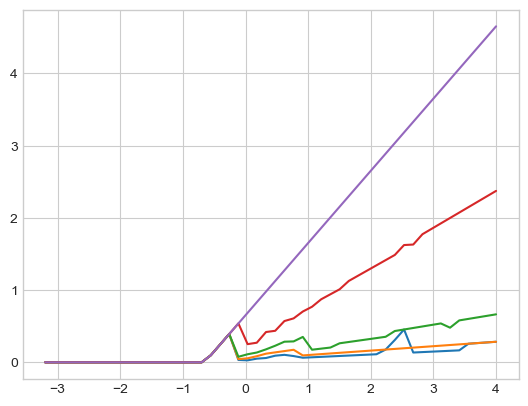

In [132]:
for t in range(par.T):
    plt.plot(aux.grid_n, sol.c_keep[t,:,10,0])

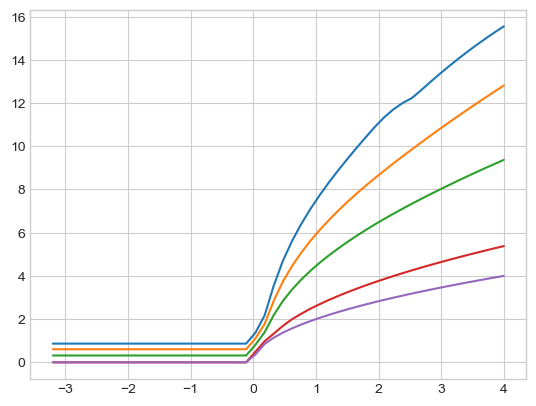

In [133]:
for t in range(par.T):
    plt.plot(aux.grid_n, sol.v_keep[t,:,0,0])